# US15

- This User Story aims to predict the average monthly water consumption cost for a new park based on its size. 
- Using data provided in the file "water consumption updated.csv," which includes daily expenses and areas of various parks, we will develop a linear regression model. 
- The goal is to establish a relationship between the park area (in hectares) and the average monthly cost associated with water consumption.

## Setup

- Import the necessary libraries

In [6]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

### Load data

- Load the data from the files "water_consumption_updated.csv" and "Area.csv."

In [7]:
data1 = pd.read_csv('us15/water_consumption_updated.csv', sep=';')
data2 = pd.read_csv('us15/Area.csv', sep=';')

data1.head()
data2.head()

,Park,Area
0,Oriental,15
1,Cidade,"69,9"
2,SaoRoque,"5,8"
3,Covelo,"7,7"
4,ArcaAgua,"2,6"


## Calculate the Average Water Consumption for Each Park

In [8]:
# Replace commas with periods and convert to float
data1['Consumption'] = data1['Consumption'].str.replace(',', '.').astype(float)

# Calculate the average water consumption for each park
average_water_consumption = data1.groupby('Park')['Consumption'].mean()

# Merge the avarage data with the area data
merged_data = pd.merge(data2, average_water_consumption, on='Park')

# Save new data to a csv file
merged_data.to_csv('us15/merged_data.csv', sep=';', index=False)

## Plot The Data

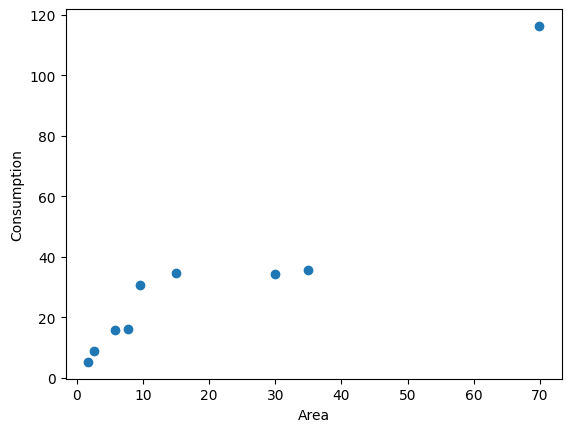

In [9]:
data3 = pd.read_csv('us15/merged_data.csv', sep=';')

data3['Area'] = data3['Area'].str.replace(',', '.').astype(float)
data3['Consumption'] = data3['Consumption'].astype(float)

x = data3['Area']
y = data3['Consumption']

plt.plot(x, y, 'o')
plt.xlabel('Area')
plt.ylabel('Consumption')
plt.show()

## Calculate the Correlation Coefficient

The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables and is calculated as follows:

$$ r = \frac{S_{xy}}{\sqrt{S_{xx} \cdot S_{yy}}}, \quad -1 \leq r \leq 1 $$

- $(S_{xx} = \sum_{i=1}^{n} (x_i - \bar{x})^2, \quad S_{yy} = \sum_{i=1}^{n} (y_i - \bar{y})^2, \quad S_{xy} = \sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y}))$
- $(x_1,...,x_n)$ and $(y_1,...,y_n)$ are the observed values of each variable.
- $(\bar{x})$ and $(\bar{y})$ are the means of the values $(x_1,...,x_n)$ and $(y_1,...,y_n)$, respectively.

The correlation coefficient (r) can be interpreted as follows:

1. \(r > 0\), indicates a **positive linear association** between the two variables. This means that as the values of one variable increase, there is a tendency for the values of the other variable to also increase.
2. \(r < 0\), indicates a **negative linear association** between the two variables. In this case, as the values of one variable increase, there is a tendency for the values of the other variable to decrease.
3. \(|r| = 1\), indicates a **perfect linear correlation** between the variables. The obtained sign $(\(\pm\))$ indicates the direction of this relationship.

| Correlation Coefficient  |   Interpretation    |
|:------------------------:|:-------------------:|
|        \(r = 1\)         |  Perfect positive   |
|   $\(0.8 \leq r < 1\)$   |   Strong positive   |
|  $\(0.5 \leq r < 0.8\)$  |  Moderate positive  |
|  $\(0.1 \leq r < 0.5\)$  |    Weak positive    |
|    $\(0 < r < 0.1\)$     | Very weak positive  |
|       $\(r = 0\)$        |        None         |
|    $\(-0.1 < r < 0\)$    | Very weak negative  |
| $\(-0.5 < r \leq -0.1\)$ |    Weak negative    |
| $\(-0.8 < r \leq -0.5\)$ |  Moderate negative  |
|  $\(-1 < r \leq -0.8\)$  |   Strong negative   |
|       $\(r = -1\)$       |  Perfect negative   |

In [10]:
correlation_coefficient = pearsonr(x, y)
print(f'correlation_coefficient r = {correlation_coefficient[0]:.4f}')

correlation_coefficient r = 0.9475


## Calculate the Linear Regression

- It defines a set of statistical techniques used to model relationships between variables and predict the value of one or more dependent variables from a set of independent variables.
- It is a statistical methodology in which the relationship between the dependent variable and the independent variable is represented by a straight line, and it is used to predict the behavior of the dependent variable from the knowledge of the independent variable.
- The relationship between these two variables is probabilistic because the relationship is not exact, meaning the value of y for the random variable (response) Y is not uniquely determined when the value of the independent variable x is specified.

The regression line is y = 5.0535 + 1.4224x


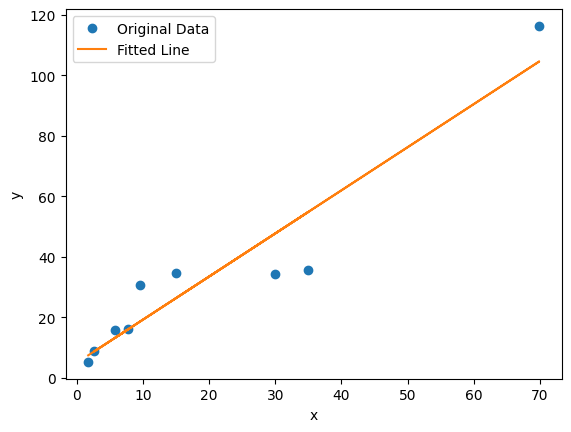

In [11]:
model = stats.linregress(x, y)
print(f'The regression line is y = {model.intercept:.4f} + {model.slope:.4f}x')

plt.plot(x, y, 'o', label='Original Data')
plt.plot(x, model.intercept + model.slope * np.array(x), label='Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Calculate Residuals

The sum of the residuals is 0.000000000000055


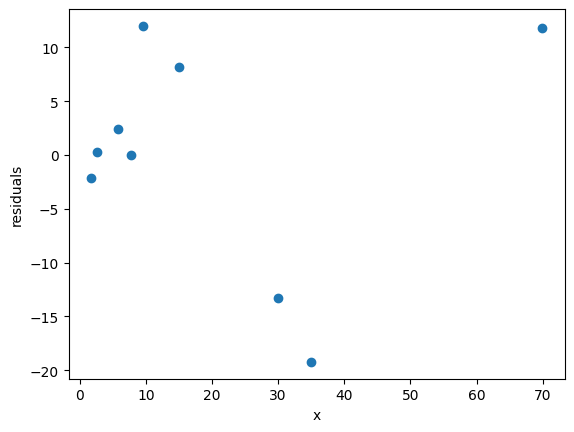

In [12]:
residuals = [yi - (model.intercept + model.slope * xi) for xi, yi in zip(x, y)] # yi - yi^

print(f'The sum of the residuals is {np.sum(residuals):.15f}')

plt.plot(x, residuals, 'o')
plt.xlabel('x')
plt.ylabel('residuals')
plt.show()

# US16

### Consider the data and results associated with US14. Applying polynomial regression, determine the best line that fits the data.

By defining the independent variable "x" as the "time" values and by drawing the graphic, we see that the function appears to be logarithmic. As such we can't apply linear regression to it. If we apply polynomial regression however, to the second degree, we can use this formula:
$$
y = \beta_{0} + \beta_{1}x + \beta_{2}x^2 + \epsilon
$$
And applying that formula to all values, we get the corresponding line.

A higher degree would give us more values to add, like:
$$
y = \beta_{0} + \beta_{1}x + \beta_{2}x^2 + ... + \beta_{m}x^m + \epsilon
$$
Which would give us a more precise line, related to the values distribution.

Using Python, the corresponding function is `polyfit()`.

In [42]:
data = pd.read_csv('us16/solution_us14.csv', delimiter=';', decimal=',')
x = data['time']
y = data['size']

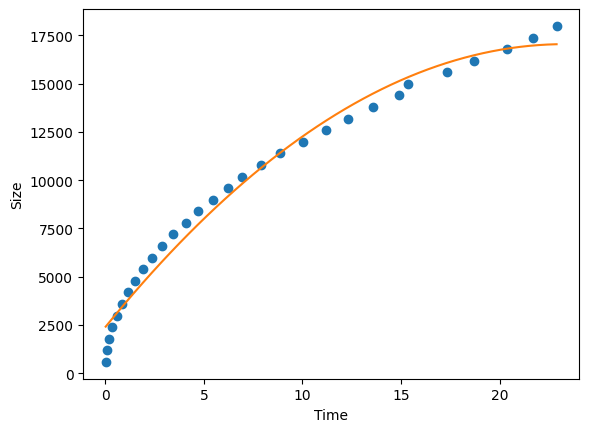

In [44]:
plt.plot(x, y, 'o')
model = np.poly1d(np.polyfit(x, y, 2))
reg_line = np.linspace(x[0], x[len(x) - 1])
plt.plot(reg_line, model(reg_line))
plt.xlabel('Time'); plt.ylabel('Size')
plt.show()

If we look at the visual representation on the graph, we see that the curved line from the polynomial regression overlaps the values much better than if it were a straight line, calculated through the linear regression.

## contribution of each team member to the development of the work
1070399 - 50%

1211742 - 50%